<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/EDA_on_PHOTOSYNTHESIS_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Monroe photosynthesis data.xlsx')
df.head()

,HHMMSS,Date,Site,Block,Clone,Photo,Cond,iWUE,Ci,Trmmol,...,SVTair,CndTotal,vp_kPa,VpdA,CndCO2,Ci_Pa,Ci/Ca,RHsfc,C2sfc,AHs/Cs
0,12:36:28,8.4.22,Monroe,Block 1,122,22.549835,0.444263,50.757890,263.643035,9.046251,...,5.845764,0.378479,3.553166,2.292598,0.241694,26.546550,0.714911,64.936917,356.867403,0.041033
1,11:31:38,8.4.22,Monroe,Block 1,433,12.020234,0.162269,74.075953,246.037621,3.898618,...,5.059045,0.152582,2.567313,2.491732,0.096189,24.785432,0.641115,52.016495,377.416360,0.016567
2,09:48:49,8.4.22,Monroe,Block 1,5077,13.043483,0.309867,42.093850,297.064197,5.447423,...,4.150476,0.276363,2.237457,1.913020,0.175454,29.915227,0.777764,57.437253,375.057248,0.019975
3,12:12:48,8.4.22,Monroe,Block 1,6323,19.675561,0.478951,41.080545,284.186119,9.138990,...,5.637956,0.403367,3.464167,2.173789,0.257956,28.614400,0.763764,65.948717,361.694313,0.035875
4,12:26:58,8.4.22,Monroe,Block 1,6329,21.622642,0.368133,58.735972,253.313532,7.695281,...,5.589438,0.321787,3.285317,2.304121,0.204824,25.504633,0.683521,62.329520,359.180604,0.037522


In [8]:
df2 = pd.read_csv('/content/drive/MyDrive/MN_Canopy_Spectral.csv.crdownload')
df2.head()

,OID_,ID_Tree,Species,Block,Name_Trees,b1_MN_01,b2_MN_01,b3_MN_01,b4_MN_01,b5_MN_01,...,b261_MN_01,b262_MN_01,b263_MN_01,b264_MN_01,b265_MN_01,b266_MN_01,b267_MN_01,b268_MN_01,b269_MN_01,b270_MN_01
0,1,Y3,DM,Block 6,T-2,0.471718,0.610092,0.357071,0.362855,0.284423,...,0.582921,0.609460,0.647135,0.621114,0.603315,0.647541,0.617664,0.591700,0.656780,0.631326
1,2,Y3,DM,Block 6,T-2,0.409898,0.557640,0.397098,0.425029,0.208947,...,0.701476,0.632619,0.685955,0.713899,0.723225,0.657531,0.635394,0.642649,0.704504,0.722515
2,3,Y3,DM,Block 6,T-2,0.623688,0.561290,0.312620,0.367307,0.297829,...,0.699147,0.678114,0.696985,0.714920,0.670727,0.621628,0.700057,0.623375,0.738413,0.722175
3,4,Y3,DM,Block 6,T-2,0.271659,0.524363,0.412648,0.317603,0.214394,...,0.781136,0.640299,0.719801,0.747926,0.668855,0.666313,0.753379,0.688407,0.764961,0.797391
4,5,Y3,DM,Block 6,T-2,0.472915,0.407564,0.257997,0.175802,0.241656,...,0.610609,0.689739,0.762407,0.705863,0.703289,0.770458,0.806326,0.615166,0.677329,0.797717


In [9]:
df2

,OID_,ID_Tree,Species,Block,Name_Trees,b1_MN_01,b2_MN_01,b3_MN_01,b4_MN_01,b5_MN_01,...,b261_MN_01,b262_MN_01,b263_MN_01,b264_MN_01,b265_MN_01,b266_MN_01,b267_MN_01,b268_MN_01,b269_MN_01,b270_MN_01
0,1,Y3,DM,Block 6,T-2,0.471718,0.610092,0.357071,0.362855,0.284423,...,0.582921,0.609460,0.647135,0.621114,0.603315,0.647541,0.617664,0.591700,0.656780,0.631326
1,2,Y3,DM,Block 6,T-2,0.409898,0.557640,0.397098,0.425029,0.208947,...,0.701476,0.632619,0.685955,0.713899,0.723225,0.657531,0.635394,0.642649,0.704504,0.722515
2,3,Y3,DM,Block 6,T-2,0.623688,0.561290,0.312620,0.367307,0.297829,...,0.699147,0.678114,0.696985,0.714920,0.670727,0.621628,0.700057,0.623375,0.738413,0.722175
3,4,Y3,DM,Block 6,T-2,0.271659,0.524363,0.412648,0.317603,0.214394,...,0.781136,0.640299,0.719801,0.747926,0.668855,0.666313,0.753379,0.688407,0.764961,0.797391
4,5,Y3,DM,Block 6,T-2,0.472915,0.407564,0.257997,0.175802,0.241656,...,0.610609,0.689739,0.762407,0.705863,0.703289,0.770458,0.806326,0.615166,0.677329,0.797717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53350,53351,X69,DD,Block 5,T-2,0.367797,0.318082,0.178336,0.187977,0.187941,...,0.767073,0.749688,0.738214,0.745132,0.763964,0.717689,0.736685,0.741642,0.789292,0.788646
53351,53352,X69,DD,Block 5,T-2,0.291283,0.308452,0.320884,0.117510,0.148682,...,0.765959,0.764427,0.751273,0.747866,0.770194,0.758061,0.751805,0.758975,0.791253,0.822100
53352,53353,X69,DD,Block 5,T-2,0.268717,0.236916,0.277084,0.067608,0.147820,...,0.829205,0.803286,0.742651,0.757621,0.788457,0.796545,0.761519,0.785511,0.773354,0.830893
53353,53354,X69,DD,Block 5,T-2,0.242976,0.279114,0.297963,0.102445,0.126465,...,0.835070,0.808719,0.770843,0.762067,0.791009,0.792827,0.790672,0.778567,0.812284,0.844463


In [10]:
df2.columns

Index(['OID_', 'ID_Tree', 'Species', 'Block', 'Name_Trees', 'b1_MN_01',
       'b2_MN_01', 'b3_MN_01', 'b4_MN_01', 'b5_MN_01',
       ...
       'b261_MN_01', 'b262_MN_01', 'b263_MN_01', 'b264_MN_01', 'b265_MN_01',
       'b266_MN_01', 'b267_MN_01', 'b268_MN_01', 'b269_MN_01', 'b270_MN_01'],
      dtype='object', length=275)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53355 entries, 0 to 53354
Columns: 275 entries, OID_ to b270_MN_01
dtypes: float64(270), int64(1), object(4)
memory usage: 111.9+ MB


In [12]:
import pandas as pd
photosynthesis_data = pd.read_excel('/content/drive/MyDrive/Monroe photosynthesis data.xlsx')

# Load the MN Canopy Spectral data (hyperspectral data)
spectral_data = pd.read_csv('/content/drive/MyDrive/MN_Canopy_Spectral.csv.crdownload')

print("Photosynthesis Data:")
print(photosynthesis_data.head())
print("\nSpectral Data:")
print(spectral_data.head())


Photosynthesis Data:
     HHMMSS    Date    Site    Block Clone      Photo      Cond       iWUE  \
0  12:36:28  8.4.22  Monroe  Block 1   122  22.549835  0.444263  50.757890   
1  11:31:38  8.4.22  Monroe  Block 1   433  12.020234  0.162269  74.075953   
2  09:48:49  8.4.22  Monroe  Block 1  5077  13.043483  0.309867  42.093850   
3  12:12:48  8.4.22  Monroe  Block 1  6323  19.675561  0.478951  41.080545   
4  12:26:58  8.4.22  Monroe  Block 1  6329  21.622642  0.368133  58.735972   

           Ci    Trmmol  ...    SVTair  CndTotal    vp_kPa      VpdA  \
0  263.643035  9.046251  ...  5.845764  0.378479  3.553166  2.292598   
1  246.037621  3.898618  ...  5.059045  0.152582  2.567313  2.491732   
2  297.064197  5.447423  ...  4.150476  0.276363  2.237457  1.913020   
3  284.186119  9.138990  ...  5.637956  0.403367  3.464167  2.173789   
4  253.313532  7.695281  ...  5.589438  0.321787  3.285317  2.304121   

     CndCO2      Ci_Pa     Ci/Ca      RHsfc       C2sfc    AHs/Cs  
0  0.2416

In [15]:
print("Unique values in photosynthesis data - Block:", photosynthesis_data['Block'].unique())
print("Unique values in photosynthesis data - Clone:", photosynthesis_data['Clone'].unique())

print("Unique values in spectral data - Block:", spectral_data['Block'].unique())
print("Unique values in spectral data - Species:", spectral_data['Species'].unique())
print("Unique values in spectral data - Name_Trees:", spectral_data['Name_Trees'].unique())


Unique values in photosynthesis data - Block: ['Block 1' 'Block 2' 'Block 3' 'Block 4' 'Block 5' 'Block 8']
Unique values in photosynthesis data - Clone: ['122' '433' '5077' '6323' '6329' '7175' '7388' '7903' '7938' '8002'
 '8005' '8015' '8019' '8198' '8199' '8717' '8729' '8749' '8814' '8853'
 '9189' '9225' '9252' '9552' '9563' '9671' '9702' '9707' '9709' '9711'
 '9742' '9755' '9980' '10016' '10029' '10145' '10146' '10149' '10226'
 '10243' '10245' '11666' '11691' '11697' '11707' '11719' '11732' '11789'
 '11820' '11822' '11840' '11859' '11867' '13695' '13700' '13724' '13725'
 '13738' '13865' '14000' '14214' '14280' '14395' '14485' '14486' '14492'
 '14500' '14507' '14508' '14520' '14583' '14591' '3-1' '6-1' '6-4' '6-5'
 '110412' '111733' '112107' '113b-3' '120-4' '147-4' '27-5' '47-5' '83-2'
 '95a-6' 's13c20' 's7c15' 'S7C2' 'S7C20' 'S7C4' 'S7C8' 'ST66' 'ST70'
 'ST75' '9734' '11728' '14490' '106b-1' 's7c20' 'st70' 'st75' '1697'
 '10014' '11711' 111733 '106B-1' '113B-3' '95A-6' 'S13C20' 'S

In [16]:
photosynthesis_data['Clone'] = photosynthesis_data['Clone'].astype(str).str.upper().str.replace('-', '').str.strip()
spectral_data['Name_Trees'] = spectral_data['Name_Trees'].astype(str).str.upper().str.replace(r'[^A-Z0-9]', '', regex=True)
filtered_photosynthesis = photosynthesis_data[photosynthesis_data['Block'].isin(['Block 4', 'Block 5'])]

# Attempt the merge on the standardized columns
merged_data = pd.merge(
    filtered_photosynthesis,
    spectral_data,
    left_on=['Clone', 'Block'],
    right_on=['Name_Trees', 'Block'],
    how='inner'
)
merged_data.head()


,HHMMSS,Date,Site,Block,Clone,Photo,Cond,iWUE,Ci,Trmmol,...,b261_MN_01,b262_MN_01,b263_MN_01,b264_MN_01,b265_MN_01,b266_MN_01,b267_MN_01,b268_MN_01,b269_MN_01,b270_MN_01
0,09:39:21,6.28.22,Monroe,Block 4,S7C15,26.857671,0.345481,77.739966,213.652899,8.426482,...,0.623672,0.516110,0.529411,0.541997,0.524554,0.540729,0.500988,0.550770,0.581717,0.601773
1,09:39:21,6.28.22,Monroe,Block 4,S7C15,26.857671,0.345481,77.739966,213.652899,8.426482,...,0.584640,0.464685,0.630134,0.658905,0.642138,0.605819,0.531799,0.599388,0.647780,0.659273
2,09:39:21,6.28.22,Monroe,Block 4,S7C15,26.857671,0.345481,77.739966,213.652899,8.426482,...,0.683849,0.607150,0.735804,0.774221,0.740758,0.732191,0.612072,0.641091,0.680604,0.701073
3,09:39:21,6.28.22,Monroe,Block 4,S7C15,26.857671,0.345481,77.739966,213.652899,8.426482,...,0.686991,0.648122,0.664719,0.609597,0.701584,0.664932,0.661563,0.611332,0.648613,0.861849
4,09:39:21,6.28.22,Monroe,Block 4,S7C15,26.857671,0.345481,77.739966,213.652899,8.426482,...,0.600060,0.716045,0.667240,0.662511,0.665355,0.696996,0.643027,0.674257,0.723324,0.628395


In [18]:
import pandas as pd
summary_stats = merged_data[['Photo', 'Cond', 'iWUE', 'Trmmol']].describe()
print(summary_stats)


             Photo         Cond         iWUE       Trmmol
count  4560.000000  4560.000000  4560.000000  4560.000000
mean     27.221878     0.315009   111.605752     8.310302
std       4.064711     0.163903    52.957990     2.982847
min      20.942824     0.095047    34.669714     3.376029
25%      22.826318     0.132675    77.739966     4.743084
50%      28.453991     0.332469    90.169564     8.426482
75%      30.402466     0.380146   162.973549    10.609567
max      34.735965     0.709727   224.463620    12.667389


In [20]:
# Group by 'Block' and calculate mean and std for key photosynthetic parameters
grouped_block = merged_data.groupby('Block')[['Photo', 'Cond', 'iWUE', 'Trmmol']].agg(['mean', 'std'])
print(grouped_block)

# Group by 'Clone'
grouped_clone = merged_data.groupby('Clone')[['Photo', 'Cond', 'iWUE', 'Trmmol']].agg(['mean', 'std'])
print(grouped_clone)

# Group by 'Species' (if applicable in spectral data)
grouped_species = merged_data.groupby('Species')[['Photo', 'Cond', 'iWUE', 'Trmmol']].agg(['mean', 'std'])
print(grouped_species)


             Photo                Cond                  iWUE             \
              mean       std      mean       std        mean        std   
Block                                                                     
Block 4  26.857671  0.000000  0.345481  0.000000   77.739966   0.000000   
Block 5  27.248904  4.211603  0.312748  0.169658  114.118760  54.048749   

           Trmmol            
             mean       std  
Block                        
Block 4  8.426482  0.000000  
Block 5  8.301681  3.091389  
            Photo                Cond                  iWUE             \
             mean       std      mean       std        mean        std   
Clone                                                                    
106B1   34.182938  0.000000  0.472415  0.000000   72.357786   0.000000   
110412  24.606016  0.000000  0.709727  0.000000   34.669714   0.000000   
112107  20.942824  0.000000  0.107895  0.000000  194.104330   0.000000   
31      31.635219  0.000000  0

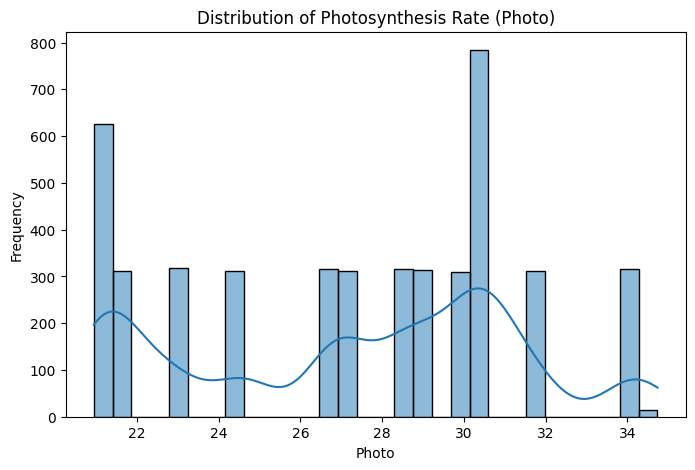

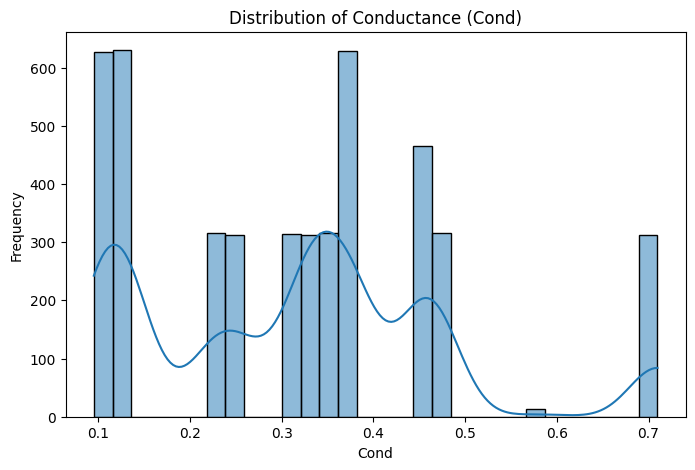

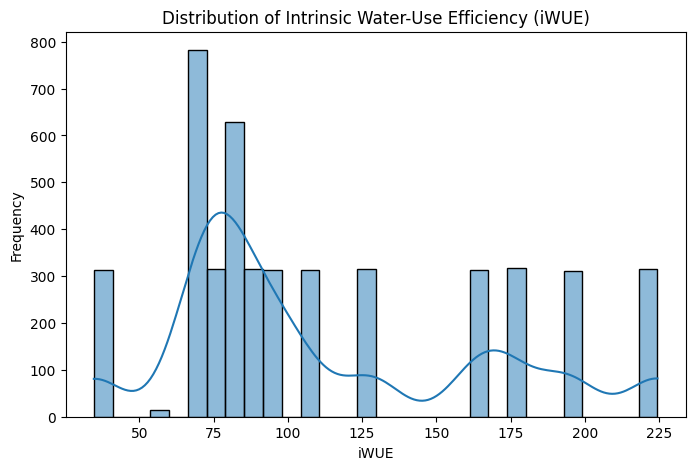

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Photo'
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['Photo'], kde=True, bins=30)
plt.title("Distribution of Photosynthesis Rate (Photo)")
plt.xlabel("Photo")
plt.ylabel("Frequency")
plt.show()

# Histogram for 'Cond'
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['Cond'], kde=True, bins=30)
plt.title("Distribution of Conductance (Cond)")
plt.xlabel("Cond")
plt.ylabel("Frequency")
plt.show()

# Histogram for 'iWUE'
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['iWUE'], kde=True, bins=30)
plt.title("Distribution of Intrinsic Water-Use Efficiency (iWUE)")
plt.xlabel("iWUE")
plt.ylabel("Frequency")
plt.show()


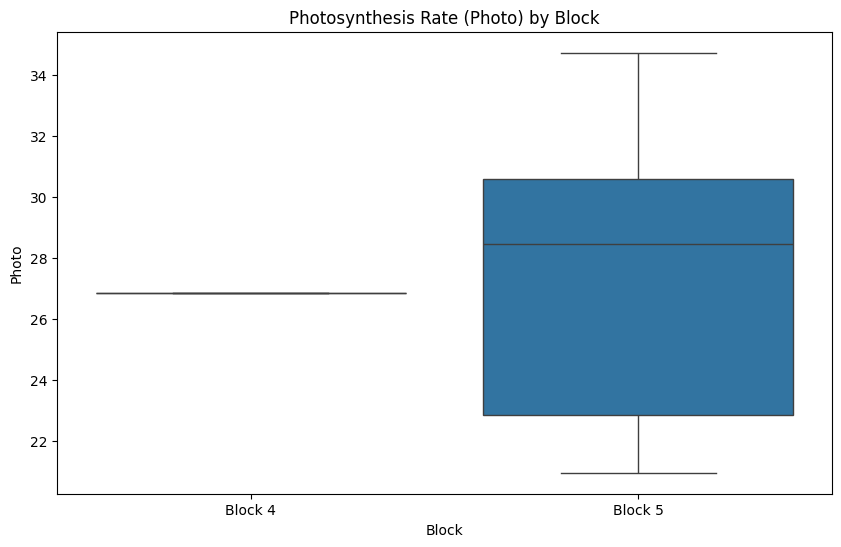

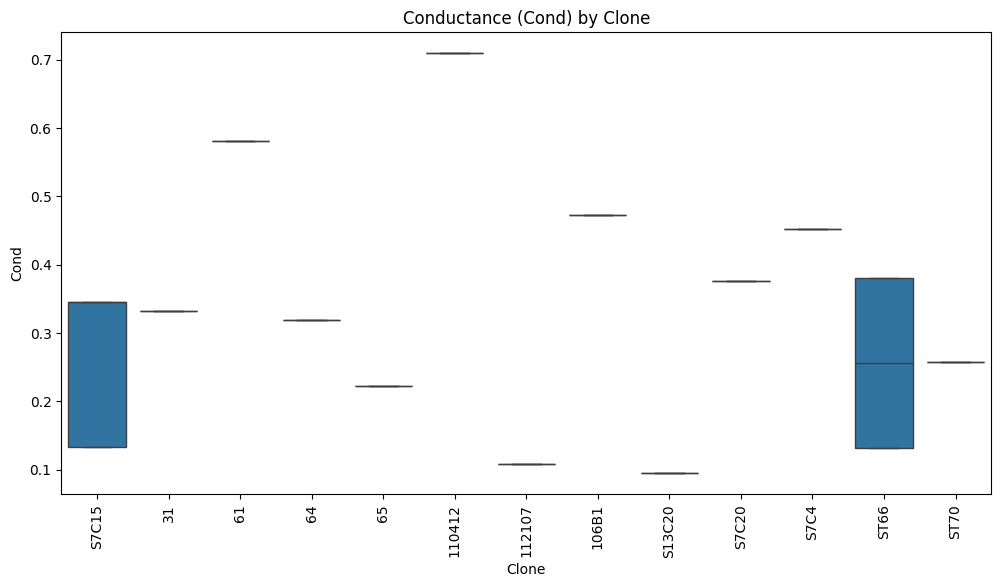

In [23]:
# Box plot for 'Photo' by 'Block'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Block', y='Photo', data=merged_data)
plt.title("Photosynthesis Rate (Photo) by Block")
plt.xlabel("Block")
plt.ylabel("Photo")
plt.show()

# Box plot for 'Cond' by 'Clone'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Clone', y='Cond', data=merged_data)
plt.title("Conductance (Cond) by Clone")
plt.xlabel("Clone")
plt.ylabel("Cond")
plt.xticks(rotation=90)
plt.show()


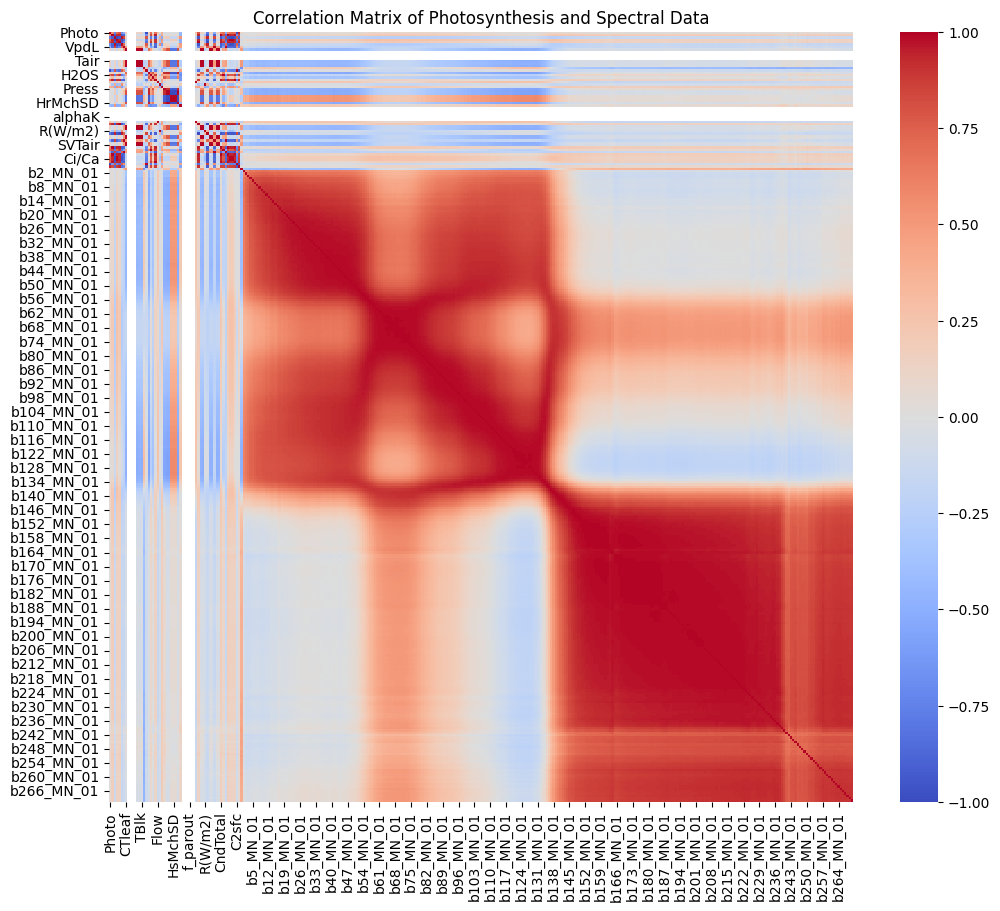

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
merged_data['HHMMSS'] = pd.to_datetime(merged_data['HHMMSS'], format='%H:%M:%S').dt.time
numeric_data = merged_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Photosynthesis and Spectral Data")
plt.show()

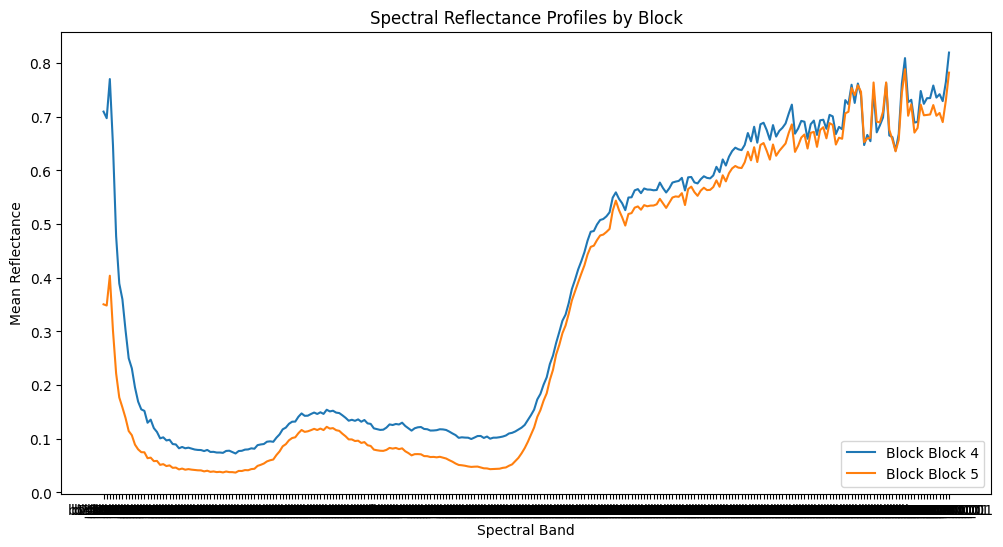

In [27]:
spectral_columns = [col for col in merged_data.columns if col.startswith('b')]
spectral_means_by_block = merged_data.groupby('Block')[spectral_columns].mean()

# Plot spectral profiles by block
plt.figure(figsize=(12, 6))
for block in spectral_means_by_block.index:
    plt.plot(spectral_means_by_block.columns, spectral_means_by_block.loc[block], label=f"Block {block}")

plt.title("Spectral Reflectance Profiles by Block")
plt.xlabel("Spectral Band")
plt.ylabel("Mean Reflectance")
plt.legend()
plt.show()
